# NLP Notebook

### Import pandas and matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# These styles look nicer than default pandas
plt.style.use('ggplot')

# We'll be able to see more text at once
pd.set_option("display.max_colwidth", 100)

### CSV to Data Frame
Read the csv proyectos_ley.csv that was constructed using the file data.ipynb and Google Sheets, and read it as a Data Frame.

In [56]:
df_old = pd.read_csv("proyectos_ley.csv")
df = df_old.drop(columns=['Unnamed: 0'])

Create a new column that combines the name and abstract of each bill.

In [57]:
df['combined'] = df.name + ' ' + df.abstract
# df.head()

### NLP and Topic Modelling
Read the file stopwords-es.txt which includes stop words and all the verbs extracted from the bills in the spacy.ipynb file.

In [58]:
file = open("stopwords-es.txt", "r")
file_data = file.read()
stopwords_es = file_data.split("\n")
# print(stopwords_es)
file.close()

The following code cells were adapted from https://investigate.ai/text-analysis/introduction-to-topic-modeling/

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
import Stemmer

# Spanish stemmer from pyStemmer
stemmer = Stemmer.Stemmer('spanish')

analyzer = TfidfVectorizer().build_analyzer() 

# Override TfidfVectorizer
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

In [60]:
vectorizer = StemmedTfidfVectorizer(stop_words = stopwords_es)
matrix = vectorizer.fit_transform(df.combined.values.astype('U'))

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names_out())
words_df.head()

/Users/saracely/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['acuerdos', 'amnistía', 'atendera', 'aumenta', 'centrar', 'conciliar', 'cooperar', 'desconcentrar', 'descongestionar', 'disminuye', 'eliminará', 'endurece', 'entendiendo', 'extendiendo', 'institucionaliza', 'ly', 'pretende', 'prima', 'queda', 're', 'sanciona', 'señala', 'tiene', 'trabajador', 'trato', 'van', 'victimicen'] not in stop_words.
  warnings.warn(


,000,002,01,019,02,020,035,043,06,092,...,webcam,whatsapp,xi,yacimient,ync,york,zon,zonal,zootecn,zuli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Running NMF topic modelling. 
Given the amount of bills (1200+), I've chosen 25 components for the topics

In [61]:
from sklearn.decomposition import NMF

In [62]:
model = NMF(n_components=25)
model.fit(matrix)

n_words = 10
feature_names = vectorizer.get_feature_names_out()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: public territorial entidad servidor cabilde administr eleccion transparent concurs nacional
Topic 1: salud calid sistem atencion acredit entidad optim orient social mental
Topic 2: educ superior institu estudi catedr preescol niñ acces icetex basic
Topic 3: delit sexual penal niñ libert menor articul adolescent codig person
Topic 4: polit electoral part movimient particip constitu organiz coalicion derech corpor
Topic 5: congres salari legal comision republ miembr 1992 sesion mensual legisl
Topic 6: distrit cultural municipi turist nacion especial departament patrimoni histor años
Topic 7: aliment derech alimentari adecu hambr 65 nutricion soberan proteg desnutricion
Topic 8: pension vejez riesg alto anual regim activ reajust sistem cotiz
Topic 9: servici transport prestacion social milit aere obligatori domiciliari usuari mult
Topic 10: ambiental sancionatori miner proced explor dañ licenci activ ecosistem explot
Topic 11: fuerz polic militar nacional miembr ascens activ depo

### Adjusting the min and max values 
Accept only words in at least 3 bills and in no more than 50% of the bills (determined by trial and error).

In [63]:
vectorizer = StemmedTfidfVectorizer(stop_words=stopwords_es, min_df=5, max_df=0.5)
matrix = vectorizer.fit_transform(df.combined.values.astype('U'))

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names_out())
words_df.head()

/Users/saracely/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['acuerdos', 'amnistía', 'atendera', 'aumenta', 'centrar', 'conciliar', 'cooperar', 'desconcentrar', 'descongestionar', 'disminuye', 'eliminará', 'endurece', 'entendiendo', 'extendiendo', 'institucionaliza', 'ly', 'pretende', 'prima', 'queda', 're', 'sanciona', 'señala', 'tiene', 'trabajador', 'trato', 'van', 'victimicen'] not in stop_words.
  warnings.warn(


,01,10,100,105,1098,11,115,12,1257,126,...,violenci,virtual,virtud,vital,viviend,voluntari,vot,votacion,vulner,zon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666513,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [64]:
model = NMF(n_components=25)
model.fit(matrix)

n_words = 10
feature_names = vectorizer.get_feature_names_out()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: polit electoral part movimient particip constitu organiz corpor progres adquisicion
Topic 1: salud atencion calid sistem acredit entidad orient optim mental social
Topic 2: nacion cultural patrimoni municipi años homenaj nacional departament centr fundacion
Topic 3: educ superior institu estudi catedr acces icetex preescol basic credit
Topic 4: delit sexual penal libert person pen conduct violenci redencion 599
Topic 5: congres republ legal salari comision represent 1992 sesion cam legisl
Topic 6: public servidor territorial entidad administr transparent eleccion concurs ciudadan registr
Topic 7: derech human aliment person agu fundamental proteccion adecu constitu alimentari
Topic 8: decret 2020 emergent econom legisl social ecolog fom med fond
Topic 9: servici transport social prestacion aere milit obligatori usuari domiciliari relacion
Topic 10: laboral contrat digital plataform social colabor joven intermedi person empres
Topic 11: distrit turist especial municipi portuari

### Creating the topic popularity data frame

In [65]:
# Convert our counts into numbers
amounts = model.transform(matrix) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

,topic_polit_electoral_part,topic_salud_atencion_calid,topic_nacion_cultural_patrimoni,topic_educ_superior_institu,topic_delit_sexual_penal,topic_congres_republ_legal,topic_public_servidor_territorial,topic_derech_human_aliment,topic_decret_2020_emergent,topic_servici_transport_social,...,topic_pension_vejez_riesg,topic_agropecuari_sector_product,topic_republ_conveni_colombi,topic_niñ_adolescent_menor,topic_paz_deb_especial,topic_ambiental_miner_sancionatori,topic_famili_proteccion_muj,topic_articul_codig_civil,topic_profesion_etic_profesional,topic_segur_vial_transit
0,0.000000,0.0,0.06834,0.0,0.0,0.000000,8.829327,0.0,0.0,0.0,...,0.000000,0.0,0.994951,17.821584,0.0,0.0,0.0,5.741077,0.0,0.0
1,1.833505,0.0,0.00000,0.0,0.0,0.344397,3.169940,0.0,0.0,0.0,...,0.252485,0.0,0.000000,0.000000,0.0,0.0,0.0,6.420774,0.0,0.0


### Preliminary chart
Showing the distribution of the topics.


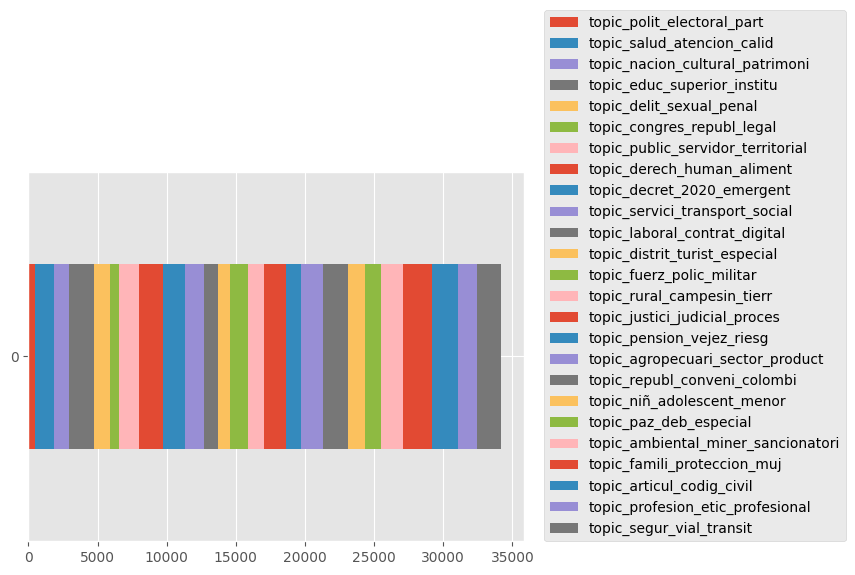

In [66]:
ax = topics.sum().to_frame().T.plot(kind='barh', stacked=True)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

### Creating a new data frame
First, a copy of the original just to be safe. But also, adding the topics data frame.

In [67]:
df_copy = df

In [68]:
merged = df_copy.merge(topics, right_index=True, left_index=True)
merged.head(2)

,name,legislature,iniciative,type,principal,secondary,abstract,status_date1,status1,status_notes1,...,topic_pension_vejez_riesg,topic_agropecuari_sector_product,topic_republ_conveni_colombi,topic_niñ_adolescent_menor,topic_paz_deb_especial,topic_ambiental_miner_sancionatori,topic_famili_proteccion_muj,topic_articul_codig_civil,topic_profesion_etic_profesional,topic_segur_vial_transit
0,Por el cual se modifica el artículo 6 de la Ley 388 de 1997. [Espacio público para menores],Jul 2018 - Jul 2019,Legislativa,Proyecto de Ley,Infraestructura,Recreación y deporte,La presente Ley busca garantizar la implementación efectiva de espacios públicos y la priorizaci...,8/1/2018,Radicado - Gaceta: S/N,Sin anotaciones,...,0.000000,0.0,0.994951,17.821584,0.0,0.0,0.0,5.741077,0.0,0.0
1,Por medio del cual se reforma el artículo 135 de la Constitución Política y se dictan otras disp...,Jul 2019 - Jul 2020,Legislativa,Proyecto Acto Legislativo,Rama Legislativa,Rama Ejecutiva,La votación se hará luego de la audiencia pública del funcionario respectivo. (...) . El funcio...,11/13/2019,Radicado - Gaceta: S/N,Sin anotaciones,...,0.252485,0.0,0.000000,0.000000,0.0,0.0,0.0,6.420774,0.0,0.0


### Most popular topic per bill
By analysing the max number in the topics data frame and adding a new column to the merged data frame.

In [69]:
# for column names of max value of each row
cols = topic_list
mxs = merged[cols].eq(merged[cols].max(axis=1), axis=0)
merged['topic'] = mxs.dot(mxs.columns + ', ').str.rstrip(', ')

### Popular topic count

In [70]:
merged.value_counts('topic')

topic
topic_famili_proteccion_muj           83
topic_articul_codig_civil             74
topic_derech_human_aliment            71
topic_republ_conveni_colombi          71
topic_educ_superior_institu           68
topic_ambiental_miner_sancionatori    67
topic_agropecuari_sector_product      65
topic_public_servidor_territorial     61
topic_justici_judicial_proces         61
topic_decret_2020_emergent            58
topic_nacion_cultural_patrimoni       58
topic_salud_atencion_calid            55
topic_fuerz_polic_militar             51
topic_segur_vial_transit              46
topic_servici_transport_social        42
topic_niñ_adolescent_menor            38
topic_profesion_etic_profesional      37
topic_paz_deb_especial                35
topic_rural_campesin_tierr            35
topic_laboral_contrat_digital         33
topic_congres_republ_legal            32
topic_pension_vejez_riesg             30
topic_delit_sexual_penal              30
topic_distrit_turist_especial         26
topic_poli

In [74]:
topic_count = pd.DataFrame(merged.value_counts('topic'))
topic_count

,count
topic,
topic_famili_proteccion_muj,83
topic_articul_codig_civil,74
topic_derech_human_aliment,71
topic_republ_conveni_colombi,71
topic_educ_superior_institu,68
topic_ambiental_miner_sancionatori,67
topic_agropecuari_sector_product,65
topic_public_servidor_territorial,61
topic_justici_judicial_proces,61


### Data Frame to csv

In [75]:
merged.to_csv('topics25.csv')

In [76]:
topic_count.to_csv('topic_count25.csv')

### Changes over time
Import datetime to change the status date string into date format.

In [77]:
from datetime import datetime

In [81]:
list_dates = []
for d in merged['status_date1']:
    date = datetime.strptime(d,'%m/%d/%Y')
    list_dates.append(date)

merged['dates'] = list_dates
merged.head()

,name,legislature,iniciative,type,principal,secondary,abstract,status_date1,status1,status_notes1,...,topic_republ_conveni_colombi,topic_niñ_adolescent_menor,topic_paz_deb_especial,topic_ambiental_miner_sancionatori,topic_famili_proteccion_muj,topic_articul_codig_civil,topic_profesion_etic_profesional,topic_segur_vial_transit,topic,dates
0,Por el cual se modifica el artículo 6 de la Ley 388 de 1997. [Espacio público para menores],Jul 2018 - Jul 2019,Legislativa,Proyecto de Ley,Infraestructura,Recreación y deporte,La presente Ley busca garantizar la implementación efectiva de espacios públicos y la priorizaci...,8/1/2018,Radicado - Gaceta: S/N,Sin anotaciones,...,0.994951,17.821584,0.0000,0.000000,0.000000,5.741077,0.000000,0.000000,topic_niñ_adolescent_menor,2018-08-01
1,Por medio del cual se reforma el artículo 135 de la Constitución Política y se dictan otras disp...,Jul 2019 - Jul 2020,Legislativa,Proyecto Acto Legislativo,Rama Legislativa,Rama Ejecutiva,La votación se hará luego de la audiencia pública del funcionario respectivo. (...) . El funcio...,11/13/2019,Radicado - Gaceta: S/N,Sin anotaciones,...,0.000000,0.000000,0.0000,0.000000,0.000000,6.420774,0.000000,0.000000,topic_articul_codig_civil,2019-11-13
2,Por medio del cual se expide el código de ética para la profesión de fonoaudiología en Colombia ...,Jul 2020 - Jul 2021,Legislativa,Proyecto de Ley,Profesiones,Asuntos administrativos,El código de ética se constituye en una herramienta que orienta al profesional en Fonoaudiología...,9/9/2020,Radicado - Gaceta: S/N,Sin anotaciones,...,1.088376,0.000000,0.0000,0.000000,0.000000,0.654877,46.070072,0.553563,topic_profesion_etic_profesional,2020-09-09
3,Por medio del cual se autoriza el reconocimiento de honorarios a los miembros de los Consejos Mu...,Jul 2021 - Jul 2022,Legislativa,Proyecto de Ley,Rama Legislativa,Economía,Tiene por objeto reconocer la actividad constitucional y legal que desarrollan los miembros de l...,11/17/2021,Radicado - Gaceta: S/N,Sin anotaciones,...,0.000000,1.071493,0.0000,0.831401,0.451265,0.000000,0.424124,0.000000,topic_fuerz_polic_militar,2021-11-17
4,Por medio de la se crean las gestoras comunitarias rurales en salud sexual y reproductiva y se d...,Jul 2021 - Jul 2022,Legislativa,Proyecto de Ley,Seguridad Social y salud,Mujer,Busca crear la figura de las gestoras comunitarias rurales en salud sexual y reproductiva como u...,4/5/2022,Radicado - Gaceta: S/N,Sin anotaciones,...,0.000000,0.000000,6.9856,0.000000,0.000000,0.000000,0.000000,0.000000,topic_salud_atencion_calid,2022-04-05


In [88]:
list_dates_end = []
for d in merged['status date']:
    date = datetime.strptime(d,'%m/%d/%Y')
    list_dates_end.append(date)

merged['dates end'] = list_dates_end
merged.head()

,name,legislature,iniciative,type,principal,secondary,abstract,status_date1,status1,status_notes1,...,topic_niñ_adolescent_menor,topic_paz_deb_especial,topic_ambiental_miner_sancionatori,topic_famili_proteccion_muj,topic_articul_codig_civil,topic_profesion_etic_profesional,topic_segur_vial_transit,topic,dates,dates end
0,Por el cual se modifica el artículo 6 de la Ley 388 de 1997. [Espacio público para menores],Jul 2018 - Jul 2019,Legislativa,Proyecto de Ley,Infraestructura,Recreación y deporte,La presente Ley busca garantizar la implementación efectiva de espacios públicos y la priorizaci...,8/1/2018,Radicado - Gaceta: S/N,Sin anotaciones,...,17.821584,0.0000,0.000000,0.000000,5.741077,0.000000,0.000000,topic_niñ_adolescent_menor,2018-08-01,2020-07-27
1,Por medio del cual se reforma el artículo 135 de la Constitución Política y se dictan otras disp...,Jul 2019 - Jul 2020,Legislativa,Proyecto Acto Legislativo,Rama Legislativa,Rama Ejecutiva,La votación se hará luego de la audiencia pública del funcionario respectivo. (...) . El funcio...,11/13/2019,Radicado - Gaceta: S/N,Sin anotaciones,...,0.000000,0.0000,0.000000,0.000000,6.420774,0.000000,0.000000,topic_articul_codig_civil,2019-11-13,2019-12-17
2,Por medio del cual se expide el código de ética para la profesión de fonoaudiología en Colombia ...,Jul 2020 - Jul 2021,Legislativa,Proyecto de Ley,Profesiones,Asuntos administrativos,El código de ética se constituye en una herramienta que orienta al profesional en Fonoaudiología...,9/9/2020,Radicado - Gaceta: S/N,Sin anotaciones,...,0.000000,0.0000,0.000000,0.000000,0.654877,46.070072,0.553563,topic_profesion_etic_profesional,2020-09-09,2020-09-17
3,Por medio del cual se autoriza el reconocimiento de honorarios a los miembros de los Consejos Mu...,Jul 2021 - Jul 2022,Legislativa,Proyecto de Ley,Rama Legislativa,Economía,Tiene por objeto reconocer la actividad constitucional y legal que desarrollan los miembros de l...,11/17/2021,Radicado - Gaceta: S/N,Sin anotaciones,...,1.071493,0.0000,0.831401,0.451265,0.000000,0.424124,0.000000,topic_fuerz_polic_militar,2021-11-17,2022-06-20
4,Por medio de la se crean las gestoras comunitarias rurales en salud sexual y reproductiva y se d...,Jul 2021 - Jul 2022,Legislativa,Proyecto de Ley,Seguridad Social y salud,Mujer,Busca crear la figura de las gestoras comunitarias rurales en salud sexual y reproductiva como u...,4/5/2022,Radicado - Gaceta: S/N,Sin anotaciones,...,0.000000,6.9856,0.000000,0.000000,0.000000,0.000000,0.000000,topic_salud_atencion_calid,2022-04-05,2022-06-20


### A (failed) steamgraph

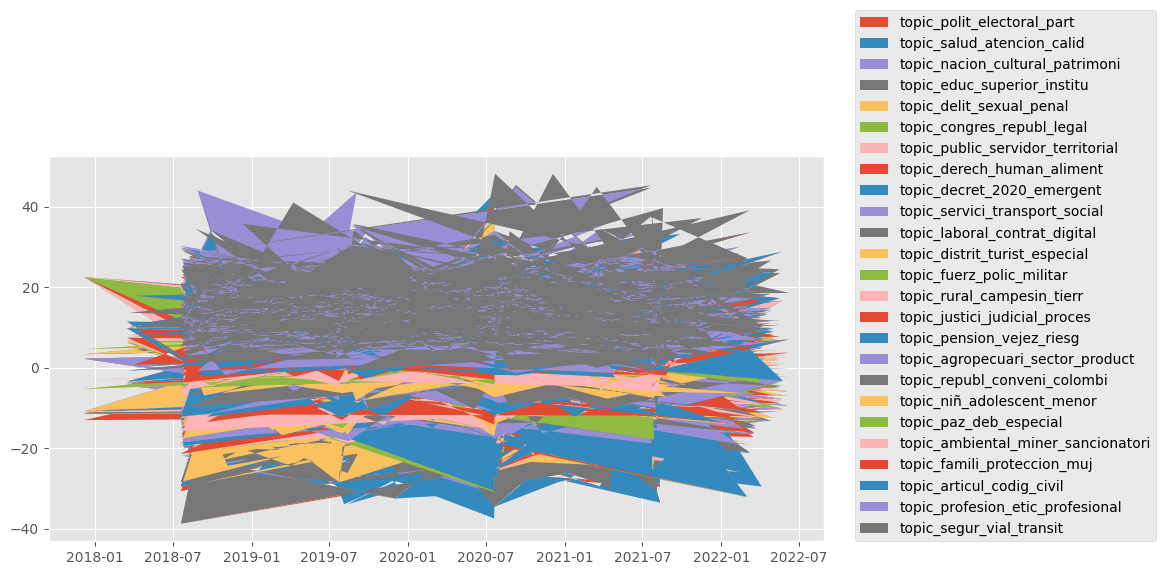

In [82]:
x_axis = merged.dates
y_axis = topics

fig, ax = plt.subplots(figsize=(10,5))

# # Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# # Move the legend off of the chart
ax.legend(loc=(1.04,0))

### Topics over time (preliminary)
I chose two topics that were key during the 2018-2022 legislation to see their change over time based on the date of the last status.

In [1]:
ax = merged.plot(x='dates', y=['topic_fuerz_polic_militar'], figsize=(10,3))
ax.legend(loc=(1.04,0))

NameError: name 'merged' is not defined

In [2]:
ax = merged.plot(x='dates', y=['topic_decret_2020_emergent'], figsize=(10,3))
ax.legend(loc=(1.04,0))

NameError: name 'merged' is not defined

### Data Frame to csv

In [89]:
merged.to_csv('bills25t.csv')